# Laboratory 2.4: Linear Regression contd.

In this practice you will extend your Linear Regression code to a more general case. Here you will need the `synthetic_dataset.csv` present in the .zip file you downloaded alongside this notebook.

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
    - [scipy](https://scipy.org/)
- Modelling:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)
    
### **All the things you need to do are marked by a "TODO" comment nearby. Make sure you *read carefully everything before working* and solve each point before submitting your solution.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
import sys
# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)

### Custom Linear Regression model

You are going to be working with the following class that you already know from the previous practice, so feel free to recycle as much code as you want (or can). In this case, you will be enhancing its functionalities, getting a more general function than the one you implemented before. 

**For now, just continue with the practice and do not fill anything, you will come back later to fill the gaps.**

In [2]:
from src.Lab_2_4_LR2 import LinearRegressor

**Data**: Remember, from the previous lab session, we had the following univariate dataset:

In [3]:
# Define data to use in this practice
x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

Use the code *you wrote* from the previous practice (not the sklearn version) to fit the data in the following cell

In [4]:
linreg = LinearRegressor()
linreg.fit(x, y)

print(linreg.coefficients[0]) #la lista es de un sólo elemento porque tenemos x de 1D 
print(linreg.intercept)

1.0363636363636366
1.2181818181818205


Por tanto, nuestros datos x e y se pueden ajustar mediante una recta : 

y = 1.03636364 x + 1.2181818181818205

Before we get into the things you'll do today, let's construct a function that provides the values for the $R^2$, RMSE and MAE. For this, the inputs of this function are the true $y$ values and the predicted $\hat{y}$ values

In [5]:
from src.Lab_2_4_LR2 import evaluate_regression

In [6]:
# Obtain regression performance metrics
y_pred = linreg.predict(x)
#print(y_pred)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9201359388275276, 'RMSE': 1.0126472956832233, 'MAE': 0.8945454545454552}


Usando los self.coefficents y el self.intercept hallados anteriormente, vemos qué tan bueno es el modelo pasándole de nuevo las X y comparando las y de verdad con las y que nos devuelve el modelo. 

De esta manera, vemos que tiene muy buena pinta -> el R^2 es bastante alto, indicando correlación, los diferentes errores son relativamente pequeños. 

## Polynomial regression

In the previous practice, you have trained a model assuming that the relationship between input and output is linear. However, in most real cases this is not common and the relationship between input and output is not linear. In this section, we are going to learn how to deal with non-linear relationships when using linear models. Read `synthetic_dataset.csv` and train a linear regression model. 

*The target variable is the last column of the dataset*

In [7]:
data = pd.read_csv("synthetic_dataset.csv")

print(data.head())
# TODO: Obtain inputs and output from data

# vamos a almacenar los datos en arrays de numpy para poder pasarselo a las funciones del py directamente. 
X = np.array(data[["Input1", "Input2", "Input3", "Input4"]]) 
y = np.array(data["Output"])


     Input1    Input2    Input3    Input4     Output
0  1.764052 -0.202117  0.330046  0.371232   6.788989
1  0.400157 -0.833231 -0.000480  0.304784   2.972974
2  0.978738  1.733600  0.818116  0.504125   7.089140
3  2.240893  0.190649  0.428214  0.135300  11.170032
4  1.867558 -0.177810 -2.503947  0.653759   8.199762


In this case we will skip the preprocessing and go straight to the modelling phase. Therefore, fit the model here.

In [8]:
# TODO: Train linear regression model

linreg = LinearRegressor() 
linreg.fit(X,y, method = "gradient_descent")
print(linreg.coefficients)
print(linreg.intercept)

Epoch 0: MSE = 35.12075001365097
[-1.93947498e-03 -5.93384077e-03  1.63024741e+00  3.05919594e+00]
3.5847358280411297


In [9]:
# TODO: Obtain and print the regression performance metrics
y_pred = linreg.predict(X)
#print(y_pred)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.5452814220127739, 'RMSE': 3.1936452824924273, 'MAE': 2.2373493670150535}


If you trained the model well, the $R^2$ metric will be terrible, in the order of $0.5$. **What happened here?** Let's try to clear this via the *study of the residuals*.

Create a function to plot the residuals of the model. This function shall:
- Create a **histogram** of the residuals.
- Create a **Q-Q plot** of the residuals.
- Create a **scatterplot of the residuals against each input variable, the true output variable and the predictions**.

**Why do we want to check the residuals this way?** 

> Vemos que el valor de R^2 es muy pequeño, lo que nos puede indicar que, a pesar de que se ha entrenado bien, el modelo no está encontrando una relacion lineal clara entre los inputs y los outputs. Esto nos indica que, o bien las variables no están muy correlacionadas o que esta correlación no es lineal. Por eso, nos interesa estudiar por un lado cómo es la relación (visualmente) entre las variables 2 a 2 , para ver si esto es por el modelo o por las variables en sí. Además, que R^2 sea tan pequeño puede deberse a que haya mucho ruido o que no sea aleatorio, por lo que nos interesa ver tambien el valor residual. 

In [10]:
def plot_residuals(data, output_column, prediction_column):
    """
    Plot residuals of a model against all variables in the DataFrame, using box plots for
    categorical variables and scatter plots for continuous variables. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
    """
    # TODO: Calculate residuals
    # la diferencia entre los datos reales y los datos obtenidos
    residuals = data[prediction_column] - data[output_column] 
    
    num_features = len(data.columns) - 2  # Exclude output and prediction columns

    # Determine the number of rows and columns for subplots
    num_rows = int(np.ceil(np.sqrt(num_features + 4)))  # Add 4 for histogram, Q-Q plot, true output vs residuals, and predictions vs residuals
    num_cols = int(np.ceil((num_features + 4) / num_rows))

    # Plot histogram of residuals
    plt.figure(figsize=(5 * num_cols, 4 * num_rows))
    plt.subplot(num_rows, num_cols, 1)
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # TODO: Plot Q-Q plot of residuals (tip: use stats.probplot from scipy)
    plt.subplot(num_rows, num_cols, 2)
    stats.probplot(residuals, dist="norm", plot=plt)       # Fill the code here
    plt.title('Q-Q Plot of Residuals')

    # TODO: Plot residuals against output variable
    plt.subplot(num_rows, num_cols, 3)
    plt.scatter(data[output_column], residuals, alpha=0.5)     # Fill the code here
    plt.title('Residuals vs True Output')
    plt.xlabel('True Output')
    plt.ylabel('Residuals')

    # Plot residuals against prediction variable
    plt.subplot(num_rows, num_cols, 4)
    plt.scatter(data[prediction_column], residuals, alpha=0.5)   # Use this as example for later
    plt.title('Residuals vs Predictions')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')

    # TODO: Plot residuals against each input variable
    for i, col in enumerate(data.columns):
        if col not in [output_column, prediction_column]:
            plt.subplot(num_rows, num_cols, i + 5)
            plt.scatter(data[col], residuals, alpha=0.5)   # Fill the code here
            plt.title(f'Residuals vs {col}')
            plt.xlabel(col)
            plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

Now, **print the coefficients** of the model **alongside the plots** you can generate with the previous function

Coefficients of the model: {'Intercept': 3.5847358280411297, 'Input1': -0.0019394749786232337, 'Input2': -0.005933840772523214, 'Input3': 1.630247407432631, 'Input4': 3.0591959392528185}


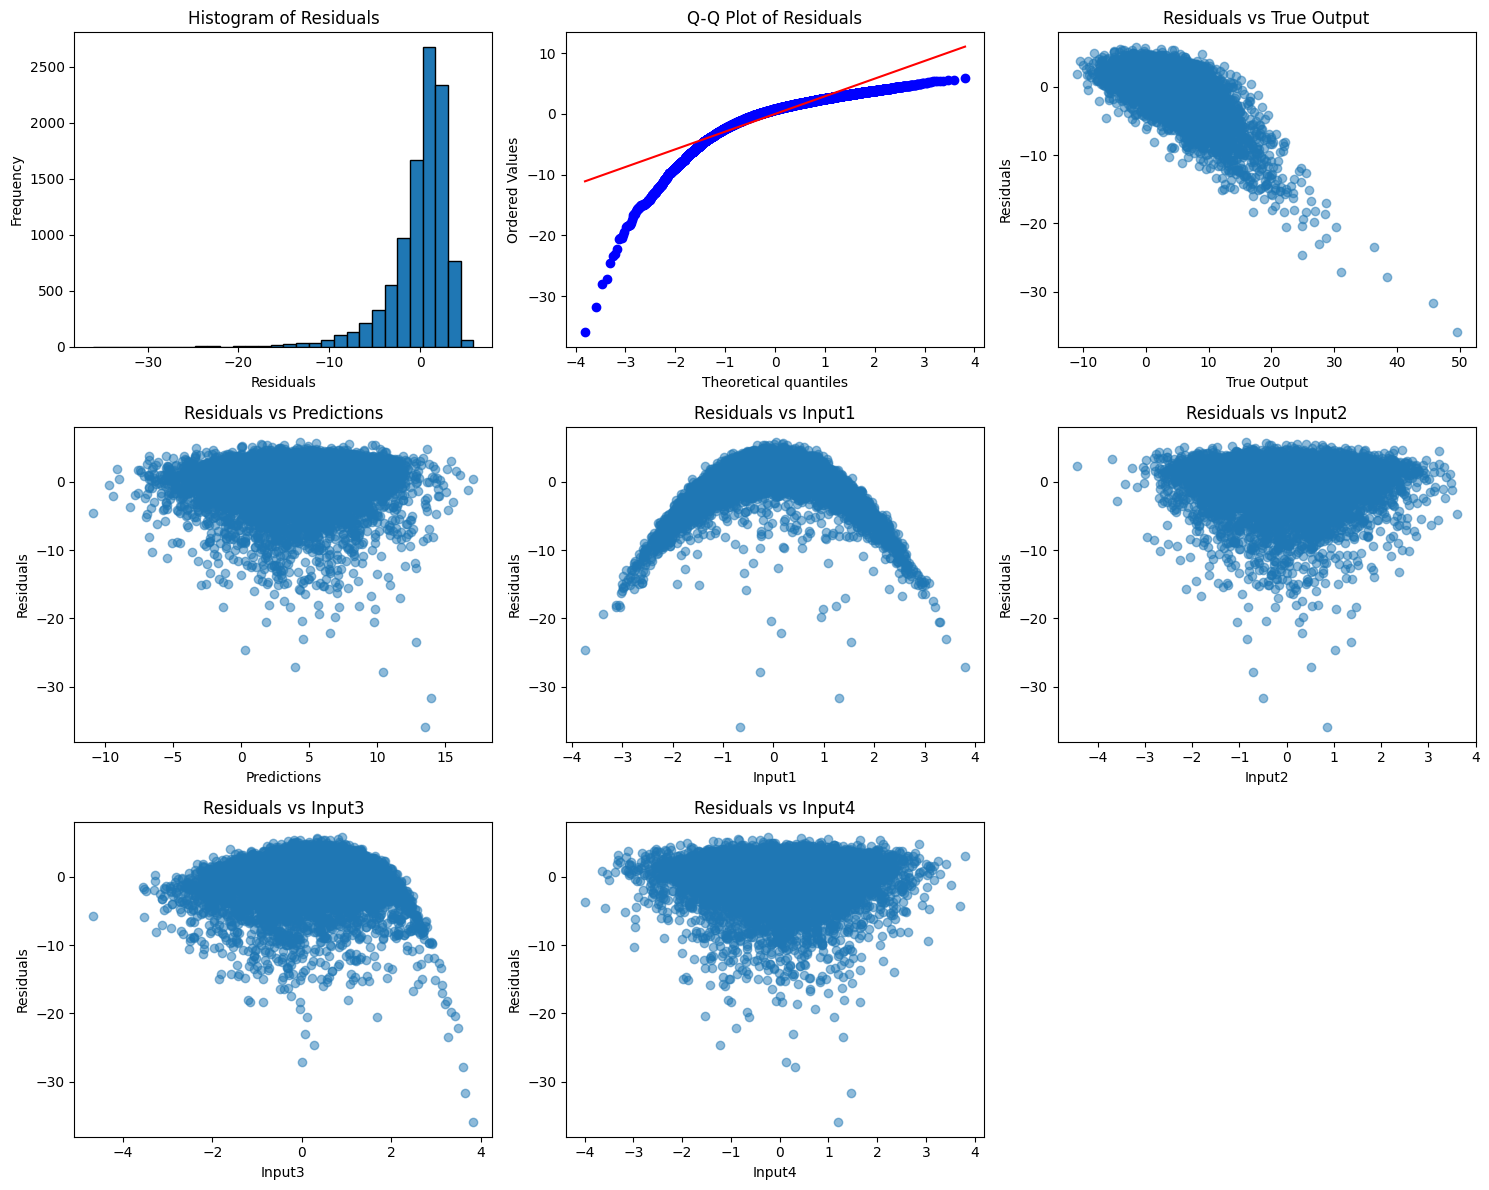

In [11]:
# TODO:  First, construct a dictionary of the coefficients to print them
# usamos el intercept y los coeficientes dados en linreg
# añadimos el intercept y para cada input su indice de coeficientes 
coef_dict = {}
coef_dict["Intercept"] = linreg.intercept  
for i in range(X.shape[1]):
    coef_dict[f"Input{i+1}"] = linreg.coefficients[i]



print(f"Coefficients of the model: {coef_dict}")

# Plot the residuals for the predictions
data["Predictions"] = linreg.predict(X)
plot_residuals(data, 'Output', 'Predictions')

**What are we seeing here? Is there any way to improve the model?**
> Por un lado, vemos que los residuos están sesgados hacia la izquierda . Esto, en conjunto con el Q-Q plot, nos indica que el valor residual no sigue una normal. Esto nos indica que tenemos un ruido que no es aleatorio y por tanto el modelo no es válido par usarse bajo esas premisas. 

Por otro lado, vemos que al comparar el residuo con las diferentes variables, vemos que en el caso del input 1 tenemos una correlación muy fuerte, pero esta no es lineal, de ahí la forma de U invertida. Si este modelo fuera el correcto, entonces deberían estar aleatoriamente distribuidos alrededor del 0,0.
Por tanto, al haber evaluado el residuo, concluimos que hemos elegido mal el modelo, habiendo escogido un modelo lineal para unos datos que deberían haber sido modelizados con un modelo en polinomio. Por tanto, para mejorar el modelo , cambiaríamos de lineal a polinómico. 

As you may expect, you should see some higher-order contribution to the behavior of the data, since some of the residuals have clear structures. In particular, `Input1` has a higher-order polynomial contribution (*which order do you think?*), while `Input2` has an *exponential* form. 

In order to fit a regression model with these contributions, construct a new dataframe where each column corresponds to the desired manipulation of each variable. Then, fit the regression model and see the results.

* Also, pay attention to the fact that you can use whatever contribution you see fit here, not just these previous ones.

In [12]:
# TODO
input1 = data["Input1"]
input2 = data["Input2"]
input3 = data["Input3"]
input4 = data["Input4"]
output = data["Output"]

# cambiamos el input 1 por un grado 2 (o grado 3, algo así) por la correlación comentada arriba. 
# probamos con input1^2  
data_transf = pd.DataFrame({'Input1': input1 ** 2,   # Substitute "None" by the degree you think works here
                            'Input2': np.exp(input3),
                            'Input3': input4,
                            'Output': output})
X_transf = data_transf.iloc[:,:3].values

# Train linear regression model
linreg = LinearRegressor()
linreg.fit(X_transf, y)

# Evaluate the metrics to see the behavior
y_pred = linreg.predict(X_transf)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9557524745534756, 'RMSE': 0.9962304737909358, 'MAE': 0.7956340344398113}


Now, print again the coefficients for the model and plot the residuals as you did before.

**What do you observe?**
> Al haber modificado el modelo, vemos por un lado que el R^2 es casi 1, indicando que el modelo es capaz de predecir muchísimo mejor que antes. Además, los errores han disminuido. 

Por otro lado, al observar las gráficas nuevas de Q-Q plot y el histograma, ahora el residuo sí tiene una distribución normal centrada en el 0, siendo aleatoria. Esto nos indica que el error que produce el modelo no está sesgado. 

Viendo por otro lado los plots del residual con las diferentes variables, vemos que ahora ya no tenemos una nube tan centralizada ni definida de los puntos, sino que son aleatorios y centrados en el 0. En el caso de los inputs1 y 2, son siempre positivas por ser logaritmicos y estar al cuadrado, pero en input3 y 4 vemos esa nuble claramente. Esto nos indica, por tanto, que el modelo está ajustando mejor la relación real entre las predicciones y los valores reales. 

Coefficients of the model: {'Input1': 1.9985407741302759, 'Input2': 0.9951259300218519, 'Input3': 2.988069929362549}


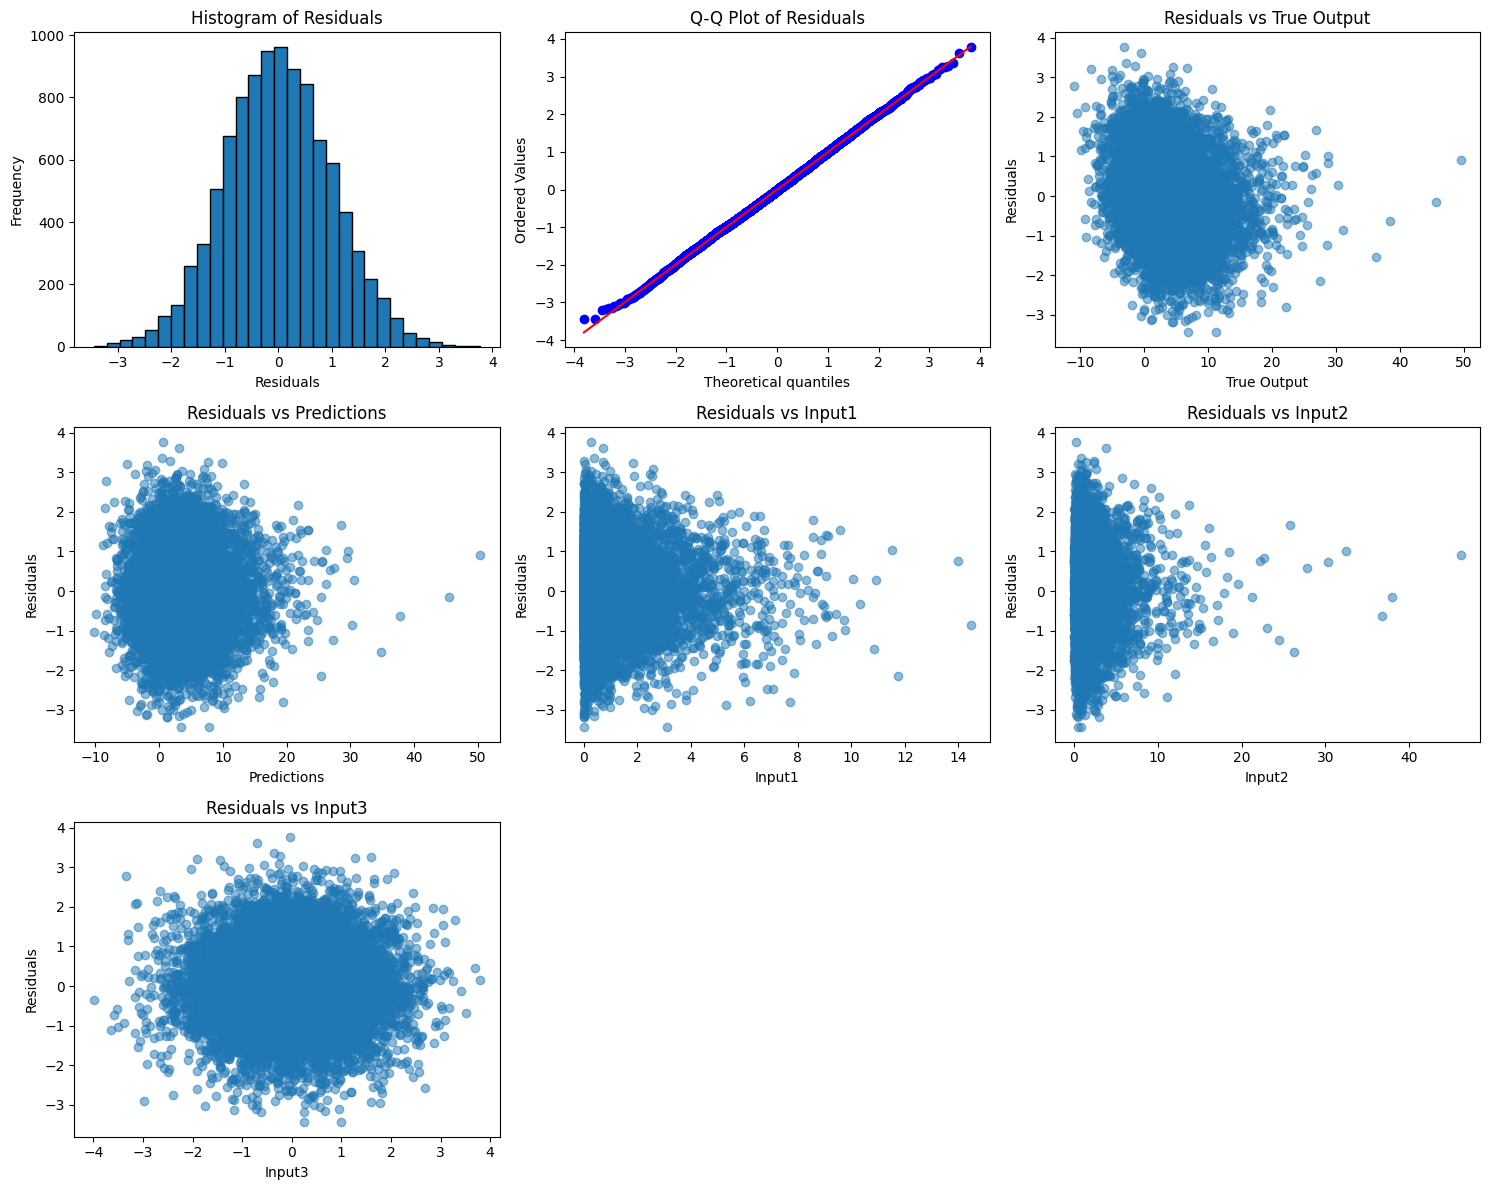

In [13]:
coef_dict = {'Input' + str(i+1): coef for i, coef in enumerate(linreg.coefficients)}
print(f"Coefficients of the model: {coef_dict}")
data_transf["Predictions"] = linreg.predict(X_transf)
plot_residuals(data_transf, 'Output', 'Predictions')

## Categorical variables

Linear regression, as is, can not deal with categorical variables. Therefore, we need to encode the variables when preprocessing the data. Complete the one-hot-encode function below. Take into account that strings shall be treated automatically as categorical variables.
<center>

![Image](https://miro.medium.com/v2/resize:fit:1358/1*ggtP4a5YaRx6l09KQaYOnw.png)

</center>

In [14]:
from src.Lab_2_4_LR2 import one_hot_encode


We will use this in a usual dataset from the internet. If everything is well, you should be able to run the following code as-is.

In [15]:
# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)


y = data['charges'].values
X = data.drop(columns=['charges']).values
# Preprocess the data
# Identify categorical columns for one-hot encoding
categorical_columns = [data.columns.get_loc(col) for col in ['sex', 'smoker', 'region']]

# One-hot encode categorical variables
X_encoded = one_hot_encode(X, categorical_columns, drop_first=True)
X_encoded = X_encoded.astype(float)                                  # Watch out for this!
#hemos codificado las variables según las variables categoricas y las hemos convertido a float. 
# las que no eran categoricas, están igual que antes. 

# Instantiate and fit the LinearRegressor
model = LinearRegressor()
model.fit(X_encoded, y)

# Predict and evaluate
y_pred = model.predict(X_encoded)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.7509130345985207, 'RMSE': 6041.6796511744515, 'MAE': 4170.8868941636}


In [16]:
print(" Así era X antes de codificarlo : ") 
print(X)

print("Así queda despues de codificarlo")
print(X_encoded)

 Así era X antes de codificarlo : 
[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]
Así queda despues de codificarlo
[[ 0.    1.    0.   ... 19.   27.9   0.  ]
 [ 1.    0.    0.   ... 18.   33.77  1.  ]
 [ 1.    0.    0.   ... 28.   33.    3.  ]
 ...
 [ 0.    0.    0.   ... 18.   36.85  0.  ]
 [ 0.    0.    0.   ... 21.   25.8   0.  ]
 [ 0.    1.    1.   ... 61.   29.07  0.  ]]


Vemos que la función ha codificado sólo las columnas de sex como "male":1 y "female": 0 , smoker (1) o no smoker(0), region (southeast(1) y northeast(0)) 

El resto de las columnas se mantiene igual poruqe no se codifican, son numéricas.

Vemos que el modelo ha definido el one-hot encoding y por eso podemos tener un modelo lineal. 

In [17]:
print (y_pred)

[25293.7130284   3448.60283431  6706.9884907  ...  4149.13248568
  1246.58493898 37085.62326757]


Compare yourself with scikit

In [18]:
from sklearn.linear_model import LinearRegression

# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

# Preprocess the data
# TODO: One-hot encode categorical variables. Use pd.get_dummies()
data_encoded = pd.get_dummies(data, drop_first= True ) 

# Split the data into features (X) and target (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X)

# Evaluate the model
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


{'R2': 0.7509130345985207, 'RMSE': 6041.6796511744515, 'MAE': 4170.886894163585}


Vemos que los resultados que obtenemos al usar scikit-learn son los mismos. Por tanto, podemos ver cómo funciona este código de esa librería por dentro y podemos emplear nuestro método sin necesidad de hacer uso de ese recurso. 

### Colored residuals

Now that we have categorical variables, the relationship between inputs and outputs might differ for different levels of the categorical variables. Therefore, you will modify the `plot_residuals` function to **color the scatter plots based on the value of a specific categorical variable**.

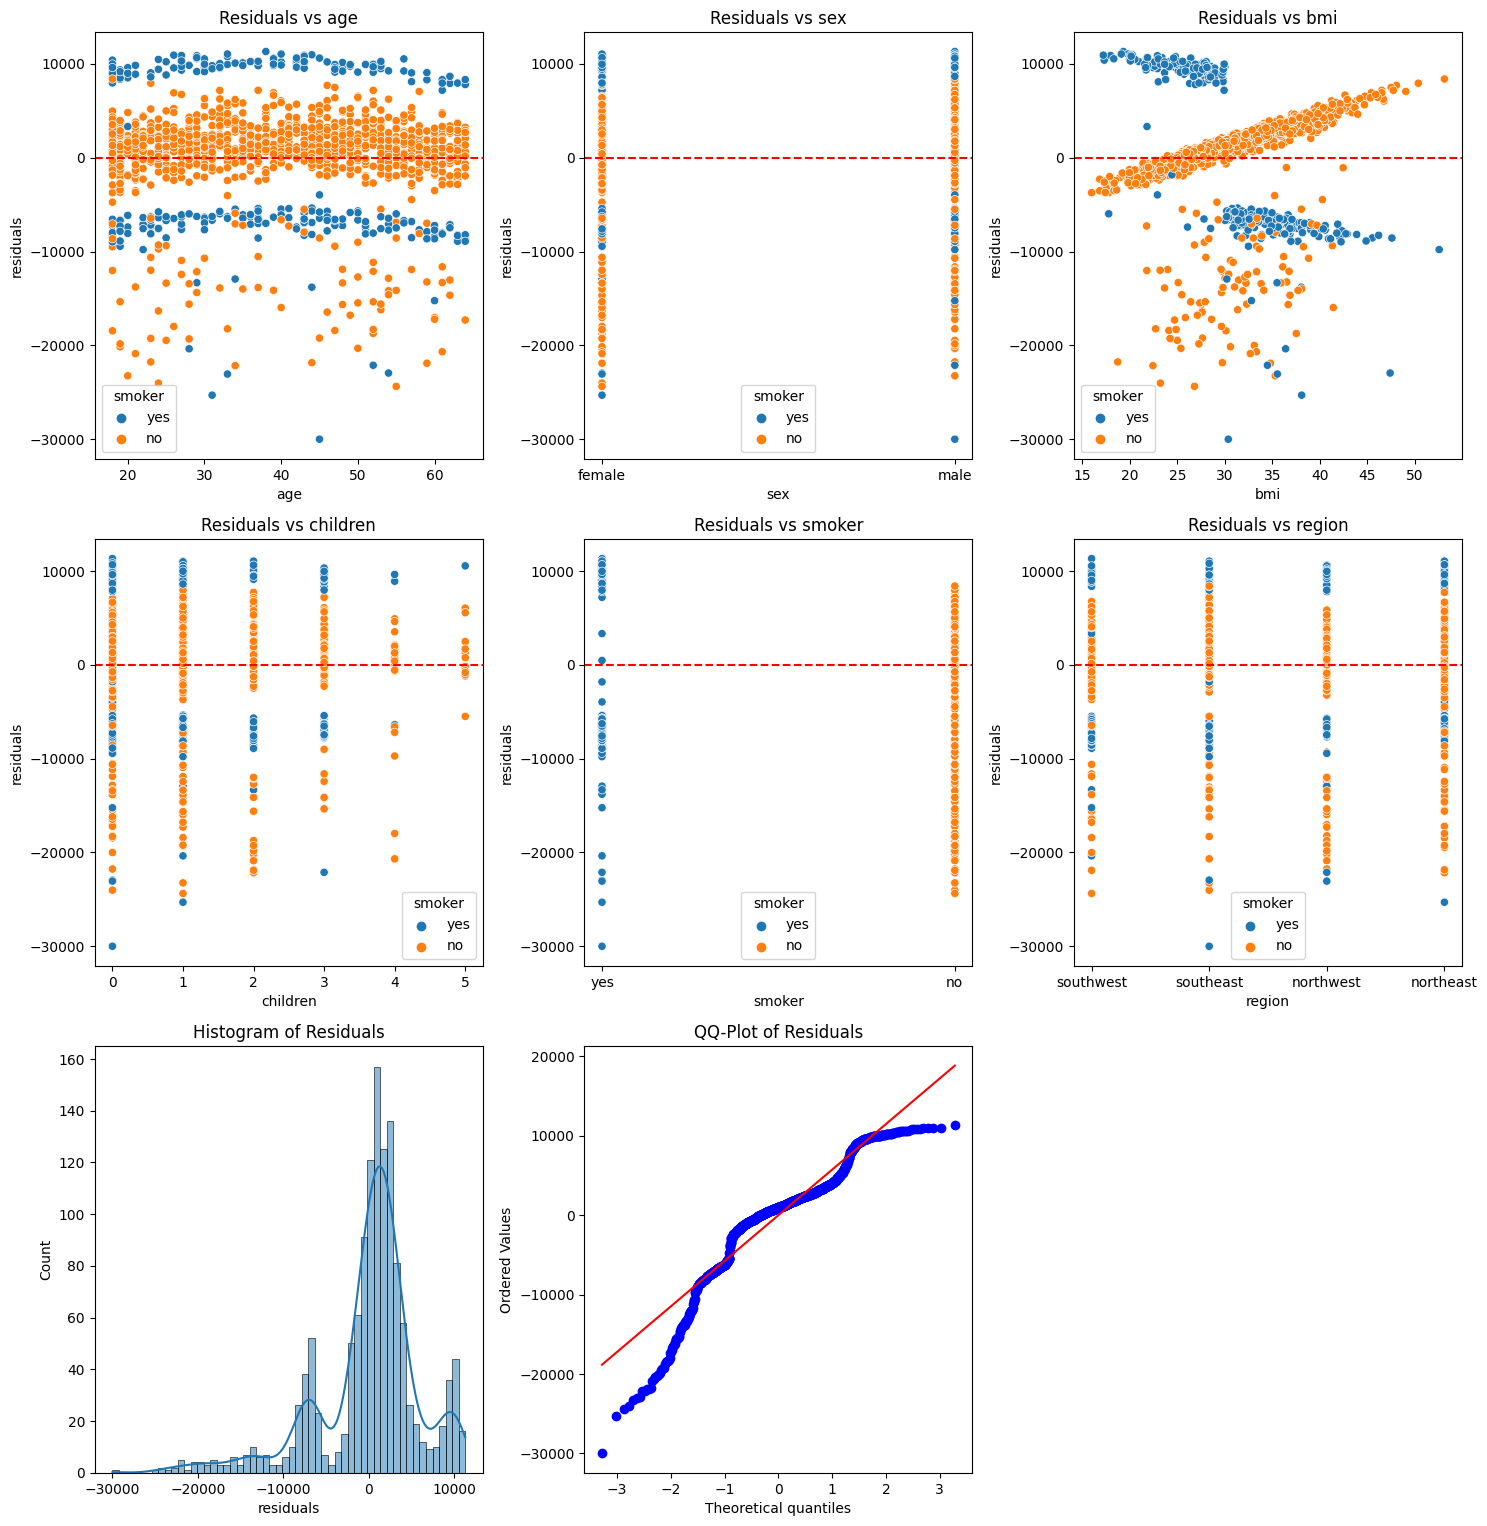

In [19]:
def plot_residuals(data, output_column, prediction_column, categorical_var=None):
    """
    Plot residuals of a model against all variables in the DataFrame. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
        categorical_var (str, optional): The name of a categorical variable for coloring. Defaults to None.
    """
    # TODO: As before, calculate residuals
    data['residuals'] =  data[prediction_column] -  data[output_column] 

    # Identify columns to plot (excluding the output and prediction columns)
    columns_to_plot = [col for col in data.columns if col not in [output_column, prediction_column, 'residuals']]

    # Number of rows and columns for the subplot
    n_cols = 3
    n_rows = int(len(columns_to_plot) / n_cols) + 2  # Additional row for histogram and QQ-plot

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # TODO: Plot each variable against the residuals
    for i, col in enumerate(columns_to_plot):
        ax = axes[i]
        
        if categorical_var and categorical_var in data.columns: 
            sns.scatterplot(x = data[col], y = data["residuals"], data=data, ax=ax, hue = data[categorical_var])
        else:
            sns.scatterplot(x = data[col], y = data["residuals"], data=data, ax=ax)
        
        ax.set_title(f'Residuals vs {col}')
        ax.axhline(0, ls='--', color='r')

    # Histogram of residuals
    sns.histplot(data['residuals'], kde=True, ax=axes[i + 1])
    axes[i + 1].set_title('Histogram of Residuals')

    # QQ-plot of residuals
    stats.probplot(data['residuals'], dist="norm", plot=axes[i + 2])
    axes[i + 2].set_title('QQ-Plot of Residuals')

    # Hide any unused axes
    for j in range(i + 3, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

data['predictions'] = model.predict(X)
# Example usage
plot_residuals(data, 'charges', 'predictions', 'smoker')


**What's happening with the residuals?**
> Al ploter los residos, vemos en las dos últimas gráficas que no siguen una normal , lo que nos indica que el error no es aleatorio y por ende no etá capturando del todo bien los resultados. Además, vemos que hay una cola muy grande en valores muy grandes , por lo que eso indica un error muy grande. 

Al comparar los residuos con cada variable, vemos que en variables como smoker y bmi que se ve un patrón claro entre el error que se produce y el resultado, y no debería ser así. Sin embargo, esto no ocurre en edad, sexo o región por ejemplo. 

# _Rolling in the deep_

Following the theory taught in class, do the following:

1. **implement the gradient descent algorithm** to train the linear regression model and reproduce the results using this training method. You can find the structure for the gradient descent inside the initial linear regression function, inside the method `fit_gradient_descent`.
2. As final steps, **display the progress of the loss function by plotting the gradient descent steps on the X-axis and the loss function on the Y-axis for each step**. 
3. Additionally, **using the same representation as in the previous section where each axis represents the values of w and b, show the sequence of steps that bring you closer to the optimum each time**. Each step should be a point in space, with coordinates (w,b). Compare all the results with the optimal solution from the scikit fit coefficients.

Feel free to add as many cells as you may need from here onwards in order to fulfill these three tasks

In [23]:
# PASO 1 -> Implementamos gradient descent al fittear el modelo y vemos qué pasa 
print ("dim de x " , X_encoded.shape)
print("dim de y ", y.shape)

# Instantiate and fit the LinearRegressor
model_2 = LinearRegressor()
[losses, valores_w, valores_b] = model_2.fit(X_encoded,y, method = "gradient_descent", learning_rate= 0.0001, iterations= 100000)

dim de x  (1338, 8)
dim de y  (1338,)
Epoch 0: MSE = 322637269.6247126
Epoch 10000: MSE = 105063599.47018999
Epoch 20000: MSE = 86873474.3350078
Epoch 30000: MSE = 73794077.34661749
Epoch 40000: MSE = 64346298.63597983
Epoch 50000: MSE = 57494106.44952479
Epoch 60000: MSE = 52503670.14800103
Epoch 70000: MSE = 48852822.60052771
Epoch 80000: MSE = 46168655.72261126
Epoch 90000: MSE = 44184012.051770985


In [36]:
# Predict and evaluate
y_pred = model_2.predict(X_encoded)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


{'R2': 0.7085699768448531, 'RMSE': 6535.056375612528, 'MAE': 4838.639425982139}


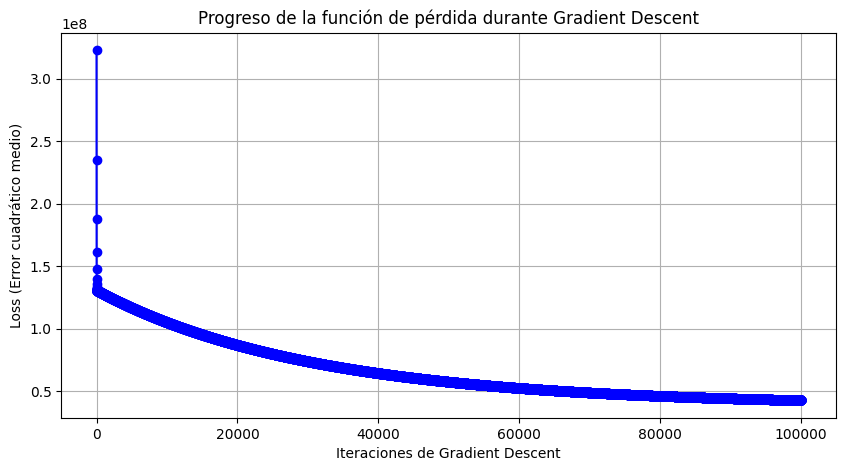

In [37]:
# PASO 2 -> Graficamos cómo va cambiando las pérdidas en las iteraciones: 

plt.figure(figsize=(10, 5))
plt.plot(range(len(losses)), losses, marker='o', linestyle='-', color='b')
plt.xlabel("Iteraciones de Gradient Descent")
plt.ylabel("Loss (Error cuadrático medio)")
plt.title("Progreso de la función de pérdida durante Gradient Descent")
plt.grid(True)
plt.show()

In [39]:
# PASO 3 -> Lo comparamos con scikit learn 
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo con scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X_encoded, y)  

# Obtener los coeficientes óptimos
w_sklearn = model_sklearn.coef_  
b_sklearn = model_sklearn.intercept_  

print (" Para este modelo generamos una predicción tal que ")
print (" y = ", model_2.intercept , " + X * ", model_2.coefficients)
print (" Las estimaciones de scikit learn para el mismo problema son : ")
print (" y = ", b_sklearn , " + X * ", w_sklearn)


 Para este modelo generamos una predicción tal que 
 y =  -2452.7840782073145  + X *  [-1.09996649e+01  1.87986779e+04 -8.13805429e+02 -7.41264625e+01
 -1.07988558e+03  2.15280242e+02  1.23384280e+02  3.49300428e+02]
 Las estimaciones de scikit learn para el mismo problema son : 
 y =  -11938.538576167077  + X *  [ -131.3143594  23848.53454191  -352.96389942 -1035.02204939
  -960.0509913    256.85635254   339.19345361   475.50054515]
